<a href="https://colab.research.google.com/github/SANGRAMLEMBE/MTech/blob/main/Deep_Neural_Network/Practical/T3_Building_Programs_to_Perform_Basic_Operations_in_Tensors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial T3: Building Programs to Perform Basic Operations in Tensors

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')



In [ ]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print(f"TensorFlow version: {tf.__version__}")
print(f"NumPy version: {np.__version__}")
print("Environment ready!")

TensorFlow version: 2.19.0
NumPy version: 2.0.2
Environment ready!


## Part 1: Custom Activation Functions

### Task 1A: Implement Basic Activation Functions

In [ ]:
def sigmoid(x):
    """Sigmoid activation: σ(x) = 1/(1+e^(-x))

    Key points:
    - Output range: (0, 1)
    - Used for binary classification
    - Suffers from vanishing gradient problem
    """
    # Clip x to prevent overflow in exp(-x)
    x = np.clip(x, -500, 500)
    return 1 / (1 + np.exp(-x))


print("Sigmoid activation functions implemented successfully!")


Sigmoid activation functions implemented successfully!


In [ ]:
def tanh_custom(x):
    """Hyperbolic tangent: tanh(x) = (e^x - e^(-x))/(e^x + e^(-x))

    Key points:
    - Output range: (-1, 1)
    - Zero-centered (better than sigmoid)
    - Still suffers from vanishing gradients
    """
    # Use numpy's built-in tanh for numerical stability
    # But showing manual implementation for understanding:
    x = np.clip(x, -500, 500)
    exp_x = np.exp(x)
    exp_neg_x = np.exp(-x)
    return (exp_x - exp_neg_x) / (exp_x + exp_neg_x)

print("tanh activation functions implemented successfully!")


tanh activation functions implemented successfully!


In [ ]:
def relu_custom(x):
    """ReLU activation: max(0,x)

    Key points:
    - Output range: [0, ∞)
    - No vanishing gradient for positive values
    - Can suffer from "dying ReLU" problem
    - Most popular activation for hidden layers
    """
    return np.maximum(0, x)
print("ReLU activation functions implemented successfully!")



ReLU activation functions implemented successfully!


In [ ]:
def leaky_relu_custom(x, alpha=0.01):
    """Leaky ReLU: x if x>0, alpha*x otherwise

    Key points:
    - Fixes dying ReLU problem
    - Small gradient for negative values
    - alpha typically 0.01 to 0.3
    """
    return np.where(x > 0, x, alpha * x)

print("Leaky ReLU activation functions implemented successfully!")



Leaky ReLU activation functions implemented successfully!


In [ ]:
# Bonus: Advanced activations
def elu_custom(x, alpha=1.0):
    """ELU activation: x if x>0, alpha*(e^x - 1) otherwise

    Key points:
    - Smooth negative part
    - Faster convergence than ReLU
    - Computationally more expensive
    """
    return np.where(x > 0, x, alpha * (np.exp(np.clip(x, -500, 500)) - 1))

print("ELU activation functions implemented successfully!")



ELU activation functions implemented successfully!


In [ ]:
def swish_custom(x, beta=1.0):
    """Swish activation: x * sigmoid(beta*x)

    Key points:
    - Self-gated activation
    - Smooth and non-monotonic
    - Good performance in deep networks
    """
    return x * sigmoid(beta * x)

print("Swish activation functions implemented successfully!")

Swish activation functions implemented successfully!


## Test Activation Functions

In [ ]:
# Test values covering edge cases
test_values = np.array([-5, -2, -1, 0, 1, 2, 5])

print("Testing activation functions with various inputs:")
print(f"Input: {test_values}")
print(f"Sigmoid:    {sigmoid(test_values).round(2)}")
print(f"Tanh:       {tanh_custom(test_values).round(2)}")
print(f"ReLU:       {relu_custom(test_values).round(2)}")
print(f"Leaky ReLU: {leaky_relu_custom(test_values).round(2)}")
print(f"ELU:        {elu_custom(test_values).round(2)}")
print(f"Swish:      {swish_custom(test_values).round(2)}")



Testing activation functions with various inputs:
Input: [-5 -2 -1  0  1  2  5]
Sigmoid:    [0.01 0.12 0.27 0.5  0.73 0.88 0.99]
Tanh:       [-1.   -0.96 -0.76  0.    0.76  0.96  1.  ]
ReLU:       [0 0 0 0 1 2 5]
Leaky ReLU: [-0.05 -0.02 -0.01  0.    1.    2.    5.  ]
ELU:        [-0.99 -0.86 -0.63  0.    1.    2.    5.  ]
Swish:      [-0.03 -0.24 -0.27  0.    0.73  1.76  4.97]


In [ ]:
# Test edge cases
print("\n🧪 Testing edge cases:")
print(f"Sigmoid(0) = {sigmoid(0)} (should be 0.5)")
print(f"Sigmoid(100) = {sigmoid(100)} (should approach 1)")
print(f"ReLU(-10) = {relu_custom(-10)} (should be 0)")
print(f"Leaky ReLU(-1, 0.1) = {leaky_relu_custom(-1, 0.1)} (should be -0.1)")


🧪 Testing edge cases:
Sigmoid(0) = 0.5 (should be 0.5)
Sigmoid(100) = 1.0 (should approach 1)
ReLU(-10) = 0 (should be 0)
Leaky ReLU(-1, 0.1) = -0.1 (should be -0.1)


### Task 1B: Gradient Computation

In [ ]:
def sigmoid_gradient(x):
    """Sigmoid derivative: σ(x) * (1 - σ(x))

    Mathematical derivation:
    d/dx[1/(1+e^(-x))] = e^(-x)/(1+e^(-x))^2 = σ(x)(1-σ(x))

    Key insight: Maximum gradient is 0.25 at x=0
    """
    s = sigmoid(x)
    return s * (1 - s)

print("Sigmoid gradient functions implemented successfully!")


Sigmoid gradient functions implemented successfully!


In [ ]:

def tanh_gradient(x):
    """Tanh derivative: 1 - tanh²(x)

    Mathematical derivation:
    d/dx[tanh(x)] = sech²(x) = 1 - tanh²(x)

    Key insight: Maximum gradient is 1 at x=0
    """
    t = tanh_custom(x)
    return 1 - t**2

print("Tanh gradient functions implemented successfully!")



Tanh gradient functions implemented successfully!


In [ ]:
def relu_gradient(x):
    """ReLU derivative: 1 if x>0, 0 otherwise

    Key insight:
    - Gradient is constant (1) for positive inputs
    - No vanishing gradient problem for x>0
    - Undefined at x=0 (we use 0 by convention)
    """
    return np.where(x > 0, 1.0, 0.0)

print("ReLU gradient functions implemented successfully!")




ReLU gradient functions implemented successfully!


In [ ]:
def leaky_relu_gradient(x, alpha=0.01):
    """Leaky ReLU derivative: 1 if x>0, alpha otherwise

    Key insight: Always has some gradient (prevents dead neurons)
    """
    return np.where(x > 0, 1.0, alpha)

print("Leaky ReLU gradient functions implemented successfully!")



Leaky ReLU gradient functions implemented successfully!


In [ ]:
def elu_gradient(x, alpha=1.0):
    """ELU derivative: 1 if x>0, alpha*e^x otherwise

    Key insight: Smooth gradient transition
    """
    return np.where(x > 0, 1.0, alpha * np.exp(np.clip(x, -500, 500)))

print("ELU gradient functions implemented successfully!")



ELU gradient functions implemented successfully!


In [ ]:

def swish_gradient(x, beta=1.0):
    """Swish derivative: sigmoid(βx) + x*β*sigmoid(βx)*(1-sigmoid(βx))

    More complex but provides smooth gradients
    """
    sig = sigmoid(beta * x)
    return sig + x * beta * sig * (1 - sig)

print("Swish gradient functions implemented successfully!")

Swish gradient functions implemented successfully!


### Test Gradient Functions

In [ ]:
# Test gradient functions
test_vals = np.array([-2, -1, 0, 1, 2])

print("Testing gradient functions:")
print(f"Input:              {test_vals}")
print(f"Sigmoid gradient:   {sigmoid_gradient(test_vals).round(2)}")
print(f"Tanh gradient:      {tanh_gradient(test_vals).round(2)}")
print(f"ReLU gradient:      {relu_gradient(test_vals).round(2)}")
print(f"Leaky ReLU grad:    {leaky_relu_gradient(test_vals).round(2)}")

# Verify key properties
print("\n🧪 Verifying gradient properties:")
print(f"Max sigmoid gradient: {sigmoid_gradient(0):.2f} (should be 0.25)")
print(f"Max tanh gradient: {tanh_gradient(0):.2f} (should be 1.0)")
print(f"ReLU gradient consistency: positive={relu_gradient(1)}, negative={relu_gradient(-1)}")

Testing gradient functions:
Input:              [-2 -1  0  1  2]
Sigmoid gradient:   [0.1  0.2  0.25 0.2  0.1 ]
Tanh gradient:      [0.07 0.42 1.   0.42 0.07]
ReLU gradient:      [0. 0. 0. 1. 1.]
Leaky ReLU grad:    [0.01 0.01 0.01 1.   1.  ]

🧪 Verifying gradient properties:
Max sigmoid gradient: 0.25 (should be 0.25)
Max tanh gradient: 1.00 (should be 1.0)
ReLU gradient consistency: positive=1.0, negative=0.0


### Visualize Activations and Gradients

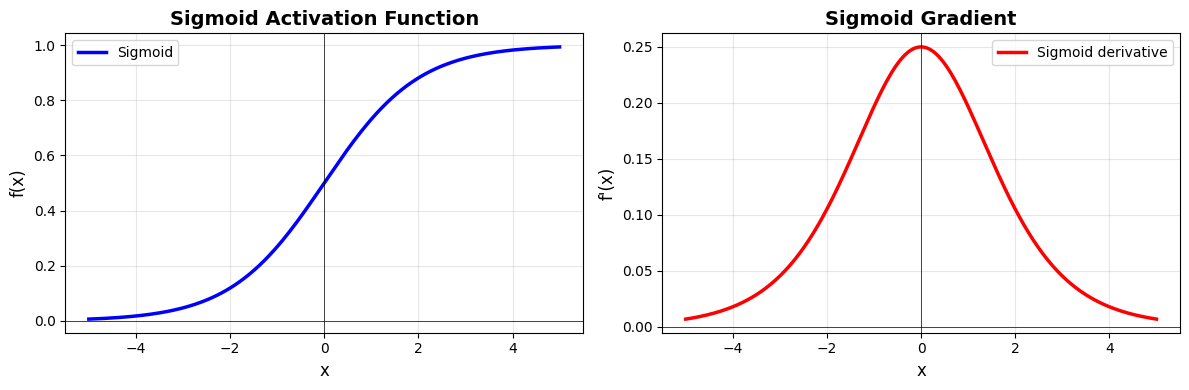

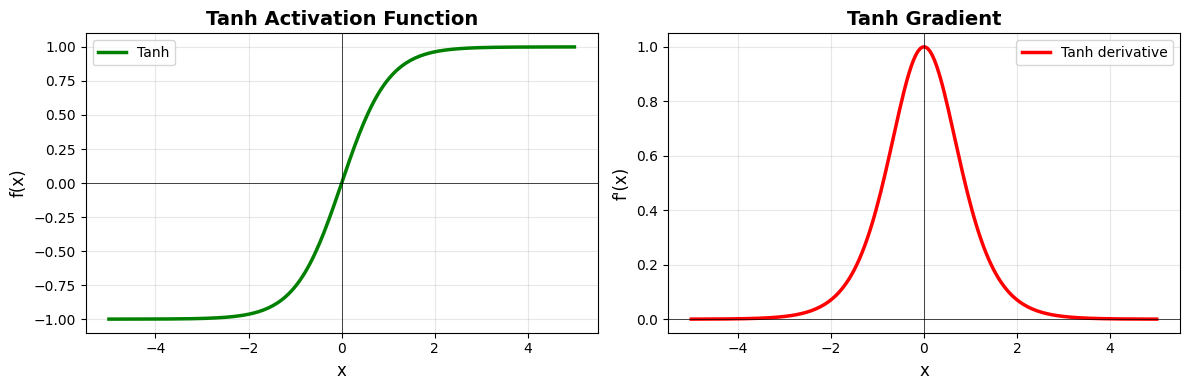

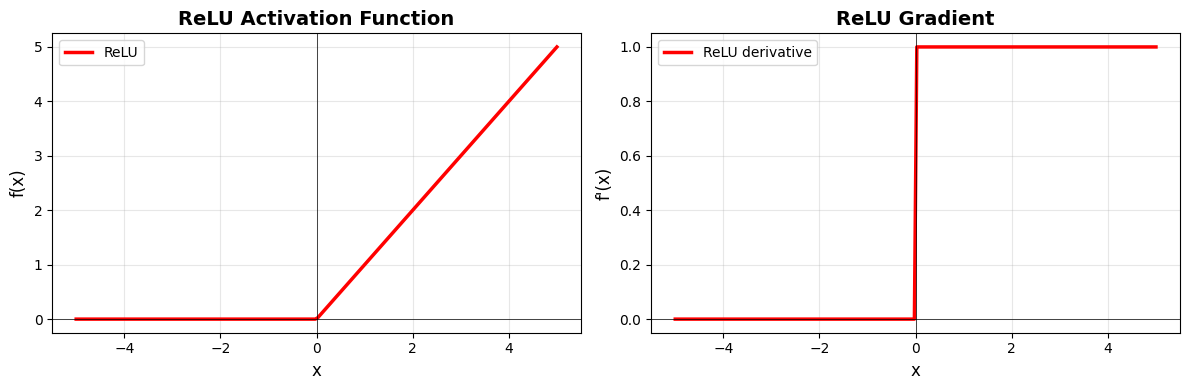

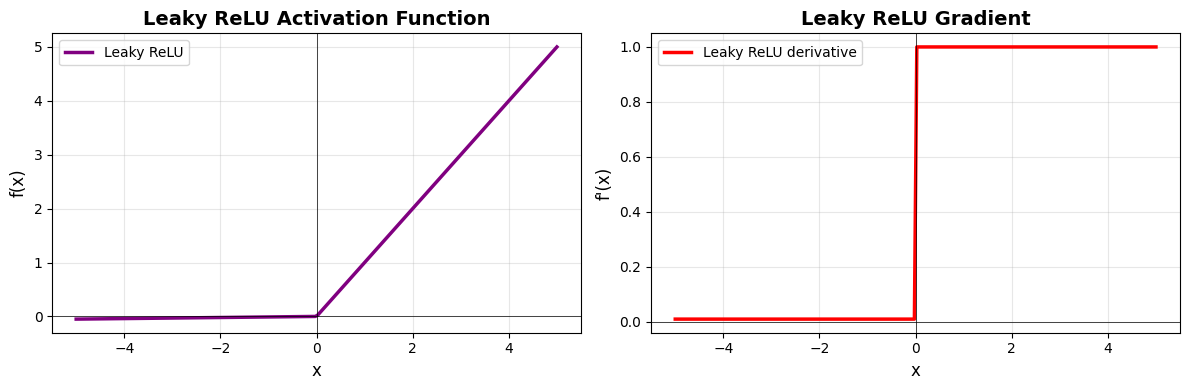

In [ ]:
def plot_activation_and_gradient(func, grad_func, name, color='blue'):
    """Plot activation function and its gradient side by side"""
    x = np.linspace(-5, 5, 200)
    y = func(x)
    dy = grad_func(x)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Plot activation function
    ax1.plot(x, y, color=color, linewidth=2.5, label=f'{name}')
    ax1.set_title(f'{name} Activation Function', fontsize=14, fontweight='bold')
    ax1.set_xlabel('x', fontsize=12)
    ax1.set_ylabel('f(x)', fontsize=12)
    ax1.grid(True, alpha=0.3)
    ax1.axhline(y=0, color='black', linewidth=0.5)
    ax1.axvline(x=0, color='black', linewidth=0.5)
    ax1.legend()

    # Plot gradient
    ax2.plot(x, dy, color='red', linewidth=2.5, label=f"{name} derivative")
    ax2.set_title(f'{name} Gradient', fontsize=14, fontweight='bold')
    ax2.set_xlabel('x', fontsize=12)
    ax2.set_ylabel("f'(x)", fontsize=12)
    ax2.grid(True, alpha=0.3)
    ax2.axhline(y=0, color='black', linewidth=0.5)
    ax2.axvline(x=0, color='black', linewidth=0.5)
    ax2.legend()

    plt.tight_layout()
    plt.show()

# Plot all activation functions and their gradients
plot_activation_and_gradient(sigmoid, sigmoid_gradient, 'Sigmoid', 'blue')
plot_activation_and_gradient(tanh_custom, tanh_gradient, 'Tanh', 'green')
plot_activation_and_gradient(relu_custom, relu_gradient, 'ReLU', 'red')
plot_activation_and_gradient(lambda x: leaky_relu_custom(x),
                            lambda x: leaky_relu_gradient(x), 'Leaky ReLU', 'purple')

### Comparative Analysis of Activations

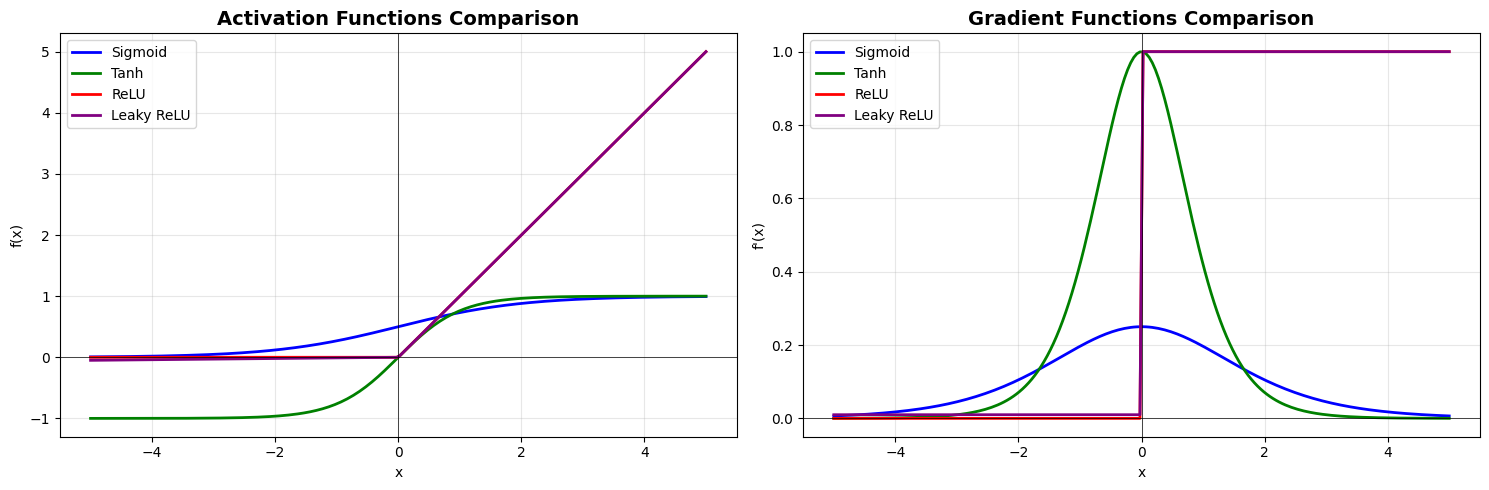


📊 Key Observations:
1. Sigmoid & Tanh suffer from vanishing gradients (gradients → 0 for large |x|)
2. ReLU has constant gradient (1) for positive inputs, 0 for negative
3. Leaky ReLU prevents dead neurons with small negative gradient
4. Sigmoid is not zero-centered, Tanh is zero-centered


In [ ]:
# Compare all activations on same plot
x = np.linspace(-5, 5, 200)

plt.figure(figsize=(15, 5))

# Plot activations
plt.subplot(1, 2, 1)
plt.plot(x, sigmoid(x), 'b-', linewidth=2, label='Sigmoid')
plt.plot(x, tanh_custom(x), 'g-', linewidth=2, label='Tanh')
plt.plot(x, relu_custom(x), 'r-', linewidth=2, label='ReLU')
plt.plot(x, leaky_relu_custom(x), 'purple', linewidth=2, label='Leaky ReLU')
plt.title('Activation Functions Comparison', fontsize=14, fontweight='bold')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.axhline(y=0, color='black', linewidth=0.5)
plt.axvline(x=0, color='black', linewidth=0.5)

# Plot gradients
plt.subplot(1, 2, 2)
plt.plot(x, sigmoid_gradient(x), 'b-', linewidth=2, label='Sigmoid')
plt.plot(x, tanh_gradient(x), 'g-', linewidth=2, label='Tanh')
plt.plot(x, relu_gradient(x), 'r-', linewidth=2, label='ReLU')
plt.plot(x, leaky_relu_gradient(x), 'purple', linewidth=2, label='Leaky ReLU')
plt.title('Gradient Functions Comparison', fontsize=14, fontweight='bold')
plt.xlabel('x')
plt.ylabel("f'(x)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.axhline(y=0, color='black', linewidth=0.5)
plt.axvline(x=0, color='black', linewidth=0.5)

plt.tight_layout()
plt.show()

print("\n📊 Key Observations:")
print("1. Sigmoid & Tanh suffer from vanishing gradients (gradients → 0 for large |x|)")
print("2. ReLU has constant gradient (1) for positive inputs, 0 for negative")
print("3. Leaky ReLU prevents dead neurons with small negative gradient")
print("4. Sigmoid is not zero-centered, Tanh is zero-centered")

## Part 2: Tensor Operations & Layer Construction (25 minutes)

### Task 2A: Basic Tensor Operations ✅ COMPLETE SOLUTIONS


In [ ]:
# 1. Create tensors of different dimensions
scalar = tf.constant(5.0)
vector = tf.constant([1, 2, 3], dtype=tf.float32)
matrix = tf.constant([[1, 2], [3, 4]], dtype=tf.float32)
tensor_3d = tf.constant([[[1, 2], [3, 4]], [[5, 6], [7, 8]]], dtype=tf.float32)

print("📐 Tensor Shapes and Properties:")
print(f"Scalar: shape={scalar.shape}, ndim={scalar.ndim}, value={scalar.numpy()}")
print(f"Vector: shape={vector.shape}, ndim={vector.ndim}")
print(f"Matrix: shape={matrix.shape}, ndim={matrix.ndim}")
print(f"3D Tensor: shape={tensor_3d.shape}, ndim={tensor_3d.ndim}")

print(f"\n🔍 Detailed tensor information:")
print(f"Vector: {vector.numpy()}")
print(f"Matrix:\n{matrix.numpy()}")
print(f"3D Tensor shape explanation: {tensor_3d.shape} = (batch_size=2, height=2, width=2)")

📐 Tensor Shapes and Properties:
Scalar: shape=(), ndim=0, value=5.0
Vector: shape=(3,), ndim=1
Matrix: shape=(2, 2), ndim=2
3D Tensor: shape=(2, 2, 2), ndim=3

🔍 Detailed tensor information:
Vector: [1. 2. 3.]
Matrix:
[[1. 2.]
 [3. 4.]]
3D Tensor shape explanation: (2, 2, 2) = (batch_size=2, height=2, width=2)


In [ ]:
# 2. Matrix multiplication exercises - COMPLETE SOLUTIONS
A = tf.constant([[1, 2], [3, 4]], dtype=tf.float32)
B = tf.constant([[5, 6], [7, 8]], dtype=tf.float32)

print("🔢 Matrix Operations:")
print(f"Matrix A:\n{A.numpy()}")
print(f"Matrix B:\n{B.numpy()}")

# Element-wise multiplication (Hadamard product)
element_wise = tf.multiply(A, B)  # or A * B
print(f"\nElement-wise multiplication (A ⊙ B):\n{element_wise.numpy()}")

# Matrix multiplication (dot product)
matrix_mult = tf.matmul(A, B)  # or A @ B
print(f"\nMatrix multiplication (A @ B):\n{matrix_mult.numpy()}")

# Manual verification of matrix multiplication
print(f"\n🧮 Manual verification:")
print(f"A[0,0]*B[0,0] + A[0,1]*B[1,0] = {A[0,0]*B[0,0] + A[0,1]*B[1,0]} = {matrix_mult[0,0]}")
print(f"A[0,0]*B[0,1] + A[0,1]*B[1,1] = {A[0,0]*B[0,1] + A[0,1]*B[1,1]} = {matrix_mult[0,1]}")

# Other useful operations
dot_product = tf.tensordot(A, B, axes=1)  # Tensor contraction
print(f"\nTensor dot product:\n{dot_product.numpy()}")

🔢 Matrix Operations:
Matrix A:
[[1. 2.]
 [3. 4.]]
Matrix B:
[[5. 6.]
 [7. 8.]]

Element-wise multiplication (A ⊙ B):
[[ 5. 12.]
 [21. 32.]]

Matrix multiplication (A @ B):
[[19. 22.]
 [43. 50.]]

🧮 Manual verification:
A[0,0]*B[0,0] + A[0,1]*B[1,0] = 19.0 = 19.0
A[0,0]*B[0,1] + A[0,1]*B[1,1] = 22.0 = 22.0

Tensor dot product:
[[19. 22.]
 [43. 50.]]


In [ ]:
# 3. Broadcasting operations - COMPLETE SOLUTIONS
vec = tf.constant([1, 2], dtype=tf.float32)  # Shape: (2,)
mat = tf.constant([[1, 2], [3, 4], [5, 6]], dtype=tf.float32)  # Shape: (3, 2)

print("📡 Broadcasting Examples:")
print(f"Vector shape: {vec.shape}")
print(f"Matrix shape: {mat.shape}")
print(f"\nOriginal matrix:\n{mat.numpy()}")
print(f"Vector to broadcast: {vec.numpy()}")

# Broadcasting addition - adds vector to each row
broadcasted_add = mat + vec  # Shape: (3,2) + (2,) -> (3,2)
print(f"\nBroadcasted addition (mat + vec):\n{broadcasted_add.numpy()}")

# Broadcasting multiplication
broadcasted_mult = mat * vec
print(f"\nBroadcasted multiplication (mat * vec):\n{broadcasted_mult.numpy()}")

# Explicit reshape for clarity
vec_reshaped = tf.reshape(vec, [1, 2])  # Shape: (1, 2)
explicit_broadcast = mat + vec_reshaped
print(f"\nExplicit reshape and broadcast:\n{explicit_broadcast.numpy()}")

# Broadcasting with different dimensions
col_vec = tf.constant([[1], [2], [3]], dtype=tf.float32)  # Shape: (3, 1)
broadcast_2d = mat + col_vec  # Shape: (3,2) + (3,1) -> (3,2)
print(f"\n2D Broadcasting (adding column vector):\n{broadcast_2d.numpy()}")

📡 Broadcasting Examples:
Vector shape: (2,)
Matrix shape: (3, 2)

Original matrix:
[[1. 2.]
 [3. 4.]
 [5. 6.]]
Vector to broadcast: [1. 2.]

Broadcasted addition (mat + vec):
[[2. 4.]
 [4. 6.]
 [6. 8.]]

Broadcasted multiplication (mat * vec):
[[ 1.  4.]
 [ 3.  8.]
 [ 5. 12.]]

Explicit reshape and broadcast:
[[2. 4.]
 [4. 6.]
 [6. 8.]]

2D Broadcasting (adding column vector):
[[2. 3.]
 [5. 6.]
 [8. 9.]]


In [ ]:
# 4. Shape manipulation - COMPLETE SOLUTIONS
original = tf.constant([[1, 2, 3], [4, 5, 6]])
print(f"📏 Shape Manipulation:")
print(f"Original tensor:\n{original.numpy()}")
print(f"Original shape: {original.shape}")

# Reshape to 3x2
reshaped = tf.reshape(original, [3, 2])
print(f"\nReshaped to 3x2:\n{reshaped.numpy()}")
print(f"New shape: {reshaped.shape}")

# Flatten to 1D
flattened = tf.reshape(original, [-1])  # -1 means "infer this dimension"
print(f"\nFlattened to 1D: {flattened.numpy()}")
print(f"Flattened shape: {flattened.shape}")

# Transpose the matrix
transposed = tf.transpose(original)
print(f"\nTransposed:\n{transposed.numpy()}")
print(f"Transposed shape: {transposed.shape}")

# Advanced reshaping
expanded = tf.expand_dims(flattened, axis=0)  # Add batch dimension
print(f"\nExpanded dims (add batch): {expanded.numpy()}")
print(f"Expanded shape: {expanded.shape}")

# Squeeze (remove dimensions of size 1)
squeezed = tf.squeeze(expanded)
print(f"\nSqueezed back: {squeezed.numpy()}")
print(f"Squeezed shape: {squeezed.shape}")

📏 Shape Manipulation:
Original tensor:
[[1 2 3]
 [4 5 6]]
Original shape: (2, 3)

Reshaped to 3x2:
[[1 2]
 [3 4]
 [5 6]]
New shape: (3, 2)

Flattened to 1D: [1 2 3 4 5 6]
Flattened shape: (6,)

Transposed:
[[1 4]
 [2 5]
 [3 6]]
Transposed shape: (3, 2)

Expanded dims (add batch): [[1 2 3 4 5 6]]
Expanded shape: (1, 6)

Squeezed back: [1 2 3 4 5 6]
Squeezed shape: (6,)


In [ ]:
# Advanced tensor operations
mat_3d = tf.random.normal([2, 3, 4])  # Random 3D tensor

print("🔬 Advanced Tensor Operations:")
print(f"3D tensor shape: {mat_3d.shape}")

# Reduction operations
sum_all = tf.reduce_sum(mat_3d)  # Sum all elements
sum_axis0 = tf.reduce_sum(mat_3d, axis=0)  # Sum along first axis
sum_axis1 = tf.reduce_sum(mat_3d, axis=1)  # Sum along second axis
mean_all = tf.reduce_mean(mat_3d)

print(f"Sum of all elements: {sum_all.numpy():.2f}")
print(f"Sum along axis 0 shape: {sum_axis0.shape}")
print(f"Sum along axis 1 shape: {sum_axis1.shape}")
print(f"Mean of all elements: {mean_all.numpy():.2f}")

# Useful for neural networks
batch_data = tf.random.normal([32, 784])  # Simulated batch of flattened images
batch_mean = tf.reduce_mean(batch_data, axis=0)  # Mean across batch
batch_std = tf.math.reduce_std(batch_data, axis=0)  # Std across batch

print(f"\n👥 Batch operations:")
print(f"Batch data shape: {batch_data.shape}")
print(f"Mean across batch shape: {batch_mean.shape}")
print(f"Std across batch shape: {batch_std.shape}")

🔬 Advanced Tensor Operations:
3D tensor shape: (2, 3, 4)
Sum of all elements: -13.16
Sum along axis 0 shape: (3, 4)
Sum along axis 1 shape: (2, 4)
Mean of all elements: -0.55

👥 Batch operations:
Batch data shape: (32, 784)
Mean across batch shape: (784,)
Std across batch shape: (784,)


### Task 2B: Dense Layer from Scratch

In [ ]:
class SimpleDenseLayer:
    """Complete implementation of a dense layer from scratch"""

    def __init__(self, input_dim, output_dim, activation='relu',
                 weight_init='xavier', use_bias=True):
        """Initialize a dense layer with weights, bias, and activation

        Args:
            input_dim: Number of input features
            output_dim: Number of output features
            activation: Activation function name
            weight_init: Weight initialization strategy
            use_bias: Whether to use bias term
        """
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.activation_name = activation
        self.use_bias = use_bias

        # Weight initialization strategies
        if weight_init == 'xavier':
            # Xavier/Glorot initialization: good for sigmoid/tanh
            limit = np.sqrt(6.0 / (input_dim + output_dim))
            self.weights = np.random.uniform(-limit, limit, (input_dim, output_dim))
        elif weight_init == 'he':
            # He initialization: good for ReLU
            std = np.sqrt(2.0 / input_dim)
            self.weights = np.random.normal(0, std, (input_dim, output_dim))
        else:
            # Default: Xavier normal
            std = np.sqrt(2.0 / (input_dim + output_dim))
            self.weights = np.random.normal(0, std, (input_dim, output_dim))

        # Bias initialization
        if use_bias:
            self.bias = np.zeros((1, output_dim))
        else:
            self.bias = None

        # Activation function registry
        self.activation_funcs = {
            'relu': relu_custom,
            'sigmoid': sigmoid,
            'tanh': tanh_custom,
            'leaky_relu': leaky_relu_custom,
            'elu': elu_custom,
            'swish': swish_custom,
            'linear': lambda x: x,
            'softmax': self._softmax
        }

        self.gradient_funcs = {
            'relu': relu_gradient,
            'sigmoid': sigmoid_gradient,
            'tanh': tanh_gradient,
            'leaky_relu': leaky_relu_gradient,
            'elu': elu_gradient,
            'swish': swish_gradient,
            'linear': lambda x: np.ones_like(x)
        }

        # Store computation for backward pass
        self.last_input = None
        self.last_z = None
        self.last_output = None

        print(f"✅ Dense layer created: {input_dim} -> {output_dim}, activation: {activation}")
        print(f"   Weights shape: {self.weights.shape}")
        print(f"   Bias shape: {self.bias.shape if self.bias is not None else 'None'}")

    def _softmax(self, x):
        """Numerically stable softmax implementation"""
        # Subtract max for numerical stability
        exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

    def forward(self, inputs):
        """Forward pass: output = activation(inputs @ weights + bias)"""
        # Store for backward pass
        self.last_input = inputs.copy()

        # Linear transformation: z = X @ W + b
        self.last_z = np.dot(inputs, self.weights)
        if self.use_bias:
            self.last_z += self.bias

        # Apply activation
        activation_func = self.activation_funcs.get(self.activation_name, lambda x: x)
        self.last_output = activation_func(self.last_z)

        return self.last_output

    def backward(self, grad_output, learning_rate=0.01):
        """Backward pass for gradient computation and weight updates

        Args:
            grad_output: Gradient from the next layer
            learning_rate: Learning rate for weight updates

        Returns:
            grad_input: Gradient w.r.t input (for previous layer)
        """
        batch_size = self.last_input.shape[0]

        # Gradient of activation function
        grad_func = self.gradient_funcs.get(self.activation_name)
        if grad_func and self.activation_name != 'softmax':
            grad_activation = grad_func(self.last_z)
            grad_z = grad_output * grad_activation
        else:
            # For softmax or unknown activations, use grad_output directly
            grad_z = grad_output

        # Gradients w.r.t parameters
        grad_weights = np.dot(self.last_input.T, grad_z) / batch_size
        grad_bias = np.sum(grad_z, axis=0, keepdims=True) / batch_size if self.use_bias else None

        # Gradient w.r.t input (for backpropagation to previous layer)
        grad_input = np.dot(grad_z, self.weights.T)

        # Update parameters (simple SGD)
        self.weights -= learning_rate * grad_weights
        if self.use_bias:
            self.bias -= learning_rate * grad_bias

        return grad_input

    def get_params(self):
        """Get layer parameters"""
        if self.use_bias:
            return {'weights': self.weights, 'bias': self.bias}
        else:
            return {'weights': self.weights}

    def set_params(self, params):
        """Set layer parameters"""
        self.weights = params['weights']
        if self.use_bias and 'bias' in params:
            self.bias = params['bias']

    def __call__(self, inputs):
        """Make layer callable"""
        return self.forward(inputs)

    def __repr__(self):
        return f"SimpleDenseLayer({self.input_dim}, {self.output_dim}, activation='{self.activation_name}')"

print("✅ SimpleDenseLayer class implemented successfully!")


✅ SimpleDenseLayer class implemented successfully!


In [ ]:
# Test the layer with different configurations
print("🧪 Testing SimpleDenseLayer:")

# Test 1: Basic layer
layer1 = SimpleDenseLayer(input_dim=784, output_dim=128, activation='relu')
test_input = np.random.randn(32, 784)  # Batch of 32 samples
output1 = layer1(test_input)

print(f"\nTest 1 - Basic layer:")
print(f"Input shape: {test_input.shape}")
print(f"Output shape: {output1.shape}")
print(f"Output statistics: mean={output1.mean():.3f}, std={output1.std():.3f}")
print(f"ReLU property (all non-negative): {np.all(output1 >= 0)}")

# Test 2: Sigmoid layer
layer2 = SimpleDenseLayer(input_dim=128, output_dim=64, activation='sigmoid')
output2 = layer2(output1)

print(f"\nTest 2 - Sigmoid layer:")
print(f"Input shape: {output1.shape}")
print(f"Output shape: {output2.shape}")
print(f"Output range: [{output2.min():.3f}, {output2.max():.3f}] (should be in [0,1])")

# Test 3: Softmax output layer
layer3 = SimpleDenseLayer(input_dim=64, output_dim=10, activation='softmax')
output3 = layer3(output2)

print(f"\nTest 3 - Softmax layer:")
print(f"Input shape: {output2.shape}")
print(f"Output shape: {output3.shape}")
print(f"Softmax property (sums to 1): {np.allclose(output3.sum(axis=1), 1.0)}")
print(f"Sample probabilities: {output3[0][:5]}")
print(f"Sample sum: {output3[0].sum():.6f}")

# Test 4: Different initializations
print(f"\n🎯 Testing weight initializations:")
layer_xavier = SimpleDenseLayer(100, 50, weight_init='xavier')
layer_he = SimpleDenseLayer(100, 50, weight_init='he')

print(f"Xavier init - Weight std: {layer_xavier.weights.std():.4f}")
print(f"He init - Weight std: {layer_he.weights.std():.4f}")

🧪 Testing SimpleDenseLayer:
✅ Dense layer created: 784 -> 128, activation: relu
   Weights shape: (784, 128)
   Bias shape: (1, 128)

Test 1 - Basic layer:
Input shape: (32, 784)
Output shape: (32, 128)
Output statistics: mean=0.549, std=0.791
ReLU property (all non-negative): True
✅ Dense layer created: 128 -> 64, activation: sigmoid
   Weights shape: (128, 64)
   Bias shape: (1, 64)

Test 2 - Sigmoid layer:
Input shape: (32, 128)
Output shape: (32, 64)
Output range: [0.028, 0.991] (should be in [0,1])
✅ Dense layer created: 64 -> 10, activation: softmax
   Weights shape: (64, 10)
   Bias shape: (1, 10)

Test 3 - Softmax layer:
Input shape: (32, 64)
Output shape: (32, 10)
Softmax property (sums to 1): True
Sample probabilities: [0.08640047 0.08864147 0.11904883 0.19118858 0.15618095]
Sample sum: 1.000000

🎯 Testing weight initializations:
✅ Dense layer created: 100 -> 50, activation: relu
   Weights shape: (100, 50)
   Bias shape: (1, 50)
✅ Dense layer created: 100 -> 50, activation: 

## Part 3: Complete Neural Network Construction

### Task 3: Build Multi-Layer Network

In [ ]:
class SimpleNeuralNetwork:
    """Complete neural network implementation from scratch"""

    def __init__(self, layer_sizes, activations, weight_init='xavier', use_bias=True):
        """Build a multi-layer neural network

        Args:
            layer_sizes: List of layer dimensions [input_dim, hidden1, hidden2, ..., output_dim]
            activations: List of activation functions for each layer
            weight_init: Weight initialization strategy
            use_bias: Whether to use bias terms
        """
        assert len(layer_sizes) >= 2, "Need at least input and output dimensions"
        assert len(activations) == len(layer_sizes) - 1, "Need activation for each layer"

        self.layer_sizes = layer_sizes
        self.activations = activations
        self.num_layers = len(layer_sizes) - 1

        # Create layers
        self.layers = []
        for i in range(self.num_layers):
            layer = SimpleDenseLayer(
                input_dim=layer_sizes[i],
                output_dim=layer_sizes[i+1],
                activation=activations[i],
                weight_init=weight_init,
                use_bias=use_bias
            )
            self.layers.append(layer)

        # Store for training
        self.training_history = {'loss': [], 'accuracy': []}

        print(f"\n🏗️ Neural Network Architecture:")
        for i, (size, activation) in enumerate(zip(layer_sizes[1:], activations)):
            print(f"   Layer {i+1}: {layer_sizes[i]} -> {size} ({activation})")

        total_params = sum(layer.weights.size +
                          (layer.bias.size if layer.use_bias else 0)
                          for layer in self.layers)
        print(f"   Total parameters: {total_params:,}")

    def forward(self, x):
        """Forward pass through all layers"""
        current_input = x
        for i, layer in enumerate(self.layers):
            current_input = layer.forward(current_input)
        return current_input

    def backward(self, y_true, y_pred, learning_rate=0.01):
        """Backward pass through all layers

        Args:
            y_true: True labels
            y_pred: Predicted values
            learning_rate: Learning rate for updates
        """
        # Compute loss gradient (for softmax + cross-entropy)
        batch_size = y_true.shape[0]
        grad_output = (y_pred - y_true) / batch_size

        # Backpropagate through layers (reverse order)
        current_grad = grad_output
        for layer in reversed(self.layers):
            current_grad = layer.backward(current_grad, learning_rate)

    def predict(self, X):
        """Make predictions"""
        return self.forward(X)

    def predict_classes(self, X):
        """Predict class labels"""
        probs = self.predict(X)
        return np.argmax(probs, axis=1)

    def compute_loss(self, y_true, y_pred, loss_type='categorical_crossentropy'):
        """Compute loss"""
        if loss_type == 'categorical_crossentropy':
            # Avoid log(0) by adding small epsilon
            epsilon = 1e-15
            y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
            return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))
        elif loss_type == 'mse':
            return np.mean((y_true - y_pred) ** 2)
        else:
            raise ValueError(f"Unknown loss type: {loss_type}")

    def compute_accuracy(self, y_true, y_pred):
        """Compute accuracy for classification"""
        y_true_classes = np.argmax(y_true, axis=1)
        y_pred_classes = np.argmax(y_pred, axis=1)
        return np.mean(y_true_classes == y_pred_classes)

    def fit(self, X, y, epochs=100, learning_rate=0.01, batch_size=32, verbose=True):
        """Train the network

        Args:
            X: Input data
            y: True labels (one-hot encoded)
            epochs: Number of training epochs
            learning_rate: Learning rate
            batch_size: Batch size for mini-batch training
            verbose: Whether to print progress
        """
        n_samples = X.shape[0]
        n_batches = (n_samples + batch_size - 1) // batch_size

        for epoch in range(epochs):
            # Shuffle data
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            epoch_loss = 0
            epoch_acc = 0

            # Mini-batch training
            for batch in range(n_batches):
                start_idx = batch * batch_size
                end_idx = min(start_idx + batch_size, n_samples)

                X_batch = X_shuffled[start_idx:end_idx]
                y_batch = y_shuffled[start_idx:end_idx]

                # Forward pass
                y_pred = self.forward(X_batch)

                # Compute loss and accuracy
                batch_loss = self.compute_loss(y_batch, y_pred)
                batch_acc = self.compute_accuracy(y_batch, y_pred)

                epoch_loss += batch_loss
                epoch_acc += batch_acc

                # Backward pass
                self.backward(y_batch, y_pred, learning_rate)

            # Average over batches
            epoch_loss /= n_batches
            epoch_acc /= n_batches

            # Store history
            self.training_history['loss'].append(epoch_loss)
            self.training_history['accuracy'].append(epoch_acc)

            # Print progress
            if verbose and (epoch + 1) % 10 == 0:
                print(f"Epoch {epoch+1}/{epochs} - Loss: {epoch_loss:.4f} - Accuracy: {epoch_acc:.4f}")

    def plot_training_history(self):
        """Plot training loss and accuracy"""
        if not self.training_history['loss']:
            print("No training history to plot. Train the model first.")
            return

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

        # Plot loss
        ax1.plot(self.training_history['loss'], 'b-', linewidth=2)
        ax1.set_title('Training Loss', fontsize=14, fontweight='bold')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss')
        ax1.grid(True, alpha=0.3)

        # Plot accuracy
        ax2.plot(self.training_history['accuracy'], 'g-', linewidth=2)
        ax2.set_title('Training Accuracy', fontsize=14, fontweight='bold')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Accuracy')
        ax2.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    def __call__(self, x):
        return self.forward(x)

    def __repr__(self):
        return f"SimpleNeuralNetwork({self.layer_sizes}, {self.activations})"

print("✅ SimpleNeuralNetwork class implemented successfully!")

✅ SimpleNeuralNetwork class implemented successfully!


In [ ]:
# Build and test the network
print("🧪 Testing SimpleNeuralNetwork:")

# Create a network for MNIST-like classification
network = SimpleNeuralNetwork(
    layer_sizes=[784, 128, 64, 10],
    activations=['relu', 'relu', 'softmax'],
    weight_init='he'  # He initialization works well with ReLU
)

# Test with dummy MNIST-like data
batch_size = 32
test_data = np.random.randn(batch_size, 784)
output = network(test_data)

print(f"\n🔍 Network Testing:")
print(f"Input shape: {test_data.shape}")
print(f"Output shape: {output.shape}")
print(f"Output is probability distribution: {np.allclose(output.sum(axis=1), 1.0)}")
print(f"Sample predictions (first 3 samples):")
for i in range(3):
    pred_class = np.argmax(output[i])
    confidence = output[i][pred_class]
    print(f"  Sample {i+1}: Class {pred_class}, Confidence: {confidence:.3f}")

# Test different architectures
print(f"\n🏗️ Testing different architectures:")

# Small network
small_net = SimpleNeuralNetwork([10, 5, 2], ['tanh', 'sigmoid'])
small_input = np.random.randn(5, 10)
small_output = small_net(small_input)
print(f"Small network output range: [{small_output.min():.3f}, {small_output.max():.3f}]")

# Deep network
deep_net = SimpleNeuralNetwork([100, 64, 32, 16, 8, 3],
                              ['relu', 'relu', 'relu', 'relu', 'softmax'])
deep_input = np.random.randn(10, 100)
deep_output = deep_net(deep_input)
print(f"Deep network maintains probability distribution: {np.allclose(deep_output.sum(axis=1), 1.0)}")

🧪 Testing SimpleNeuralNetwork:
✅ Dense layer created: 784 -> 128, activation: relu
   Weights shape: (784, 128)
   Bias shape: (1, 128)
✅ Dense layer created: 128 -> 64, activation: relu
   Weights shape: (128, 64)
   Bias shape: (1, 64)
✅ Dense layer created: 64 -> 10, activation: softmax
   Weights shape: (64, 10)
   Bias shape: (1, 10)

🏗️ Neural Network Architecture:
   Layer 1: 784 -> 128 (relu)
   Layer 2: 128 -> 64 (relu)
   Layer 3: 64 -> 10 (softmax)
   Total parameters: 109,386

🔍 Network Testing:
Input shape: (32, 784)
Output shape: (32, 10)
Output is probability distribution: True
Sample predictions (first 3 samples):
  Sample 1: Class 2, Confidence: 0.431
  Sample 2: Class 6, Confidence: 0.453
  Sample 3: Class 2, Confidence: 0.393

🏗️ Testing different architectures:
✅ Dense layer created: 10 -> 5, activation: tanh
   Weights shape: (10, 5)
   Bias shape: (1, 5)
✅ Dense layer created: 5 -> 2, activation: sigmoid
   Weights shape: (5, 2)
   Bias shape: (1, 2)

🏗️ Neural Ne

### Compare with TensorFlow/Keras Implementation

In [ ]:
# Build equivalent Keras model for comparison
def build_keras_equivalent():
    """Build equivalent network using Keras"""
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

keras_model = build_keras_equivalent()
keras_output = keras_model(test_data)

print("🆚 Comparison with Keras:")
print(f"\nKeras model output shape: {keras_output.shape}")
print(f"Keras model parameter count: {keras_model.count_params():,}")

# Calculate our model's parameter count
our_params = sum(layer.weights.size +
                (layer.bias.size if layer.use_bias else 0)
                for layer in network.layers)
print(f"Our model parameter count: {our_params:,}")
print(f"Parameter count match: {our_params == keras_model.count_params()}")

# Display detailed model architecture comparison
print(f"\n📊 Detailed Architecture Comparison:")
print(f"\nOur Model:")
for i, layer in enumerate(network.layers):
    params = layer.weights.size + (layer.bias.size if layer.use_bias else 0)
    print(f"  Layer {i+1}: {layer.input_dim} -> {layer.output_dim} ({layer.activation_name}) | {params:,} params")

print(f"\nKeras Model:")
keras_model.summary()

# Compare outputs (they will be different due to different weight initialization)
print(f"\n🔍 Output Comparison:")
print(f"Our model - first sample probabilities: {network(test_data[:1])[0][:5]}")
print(f"Keras model - first sample probabilities: {keras_model(test_data[:1]).numpy()[0][:5]}")
print(f"Note: Outputs differ due to different weight initialization, but shapes and properties match!")

🆚 Comparison with Keras:

Keras model output shape: (32, 10)
Keras model parameter count: 109,386
Our model parameter count: 109,386
Parameter count match: True

📊 Detailed Architecture Comparison:

Our Model:
  Layer 1: 784 -> 128 (relu) | 100,480 params
  Layer 2: 128 -> 64 (relu) | 8,256 params
  Layer 3: 64 -> 10 (softmax) | 650 params

Keras Model:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)


🔍 Output Comparison:
Our model - first sample probabilities: [0.00417799 0.28865482 0.43124454 0.03962942 0.00448388]
Keras model - first sample probabilities: [0.10366837 0.09667007 0.03436364 0.09037472 0.10794594]
Note: Outputs differ due to different weight initialization, but shapes and properties match!


## Comprehensive Unit Tests

In [ ]:
def run_comprehensive_unit_tests():
    """Comprehensive testing suite for all implementations"""
    print("🧪 Running Comprehensive Unit Tests...\n")

    tests_passed = 0
    tests_total = 0

    print("=" * 60)
    print("TEST SECTION 1: ACTIVATION FUNCTIONS")
    print("=" * 60)

    # Test 1: Activation functions
    try:
        tests_total += 6

        # Sigmoid tests
        assert abs(sigmoid(0) - 0.5) < 1e-6, "Sigmoid(0) should be 0.5"
        tests_passed += 1
        print("✅ Sigmoid(0) = 0.5")

        assert sigmoid(100) > 0.99, "Sigmoid(100) should approach 1"
        tests_passed += 1
        print("✅ Sigmoid saturation behavior")

        # ReLU tests
        assert relu_custom(-1) == 0 and relu_custom(1) == 1, "ReLU test failed"
        tests_passed += 1
        print("✅ ReLU basic functionality")

        # Leaky ReLU test
        assert abs(leaky_relu_custom(-1, 0.01) - (-0.01)) < 1e-6, "Leaky ReLU test failed"
        tests_passed += 1
        print("✅ Leaky ReLU negative slope")

        # Tanh test
        assert abs(tanh_custom(0)) < 1e-6, "Tanh(0) should be 0"
        tests_passed += 1
        print("✅ Tanh zero-centered")

        # Array input test
        test_array = np.array([-1, 0, 1])
        sigmoid_array = sigmoid(test_array)
        assert sigmoid_array.shape == test_array.shape, "Sigmoid should preserve array shape"
        tests_passed += 1
        print("✅ Array input handling")

    except AssertionError as e:
        print(f"❌ Activation function test failed: {e}")
    except Exception as e:
        print(f"❌ Activation functions error: {e}")

    print("\n" + "=" * 60)
    print("TEST SECTION 2: GRADIENT FUNCTIONS")
    print("=" * 60)

    # Test 2: Gradient functions
    try:
        tests_total += 4

        # Sigmoid gradient
        assert abs(sigmoid_gradient(0) - 0.25) < 1e-6, "Sigmoid gradient at 0 should be 0.25"
        tests_passed += 1
        print("✅ Sigmoid gradient maximum")

        # Tanh gradient
        assert abs(tanh_gradient(0) - 1.0) < 1e-6, "Tanh gradient at 0 should be 1"
        tests_passed += 1
        print("✅ Tanh gradient maximum")

        # ReLU gradient
        assert relu_gradient(1) == 1 and relu_gradient(-1) == 0, "ReLU gradient test failed"
        tests_passed += 1
        print("✅ ReLU gradient step function")

        # Gradient array handling
        test_vals = np.array([-1, 0, 1])
        grad_vals = sigmoid_gradient(test_vals)
        assert grad_vals.shape == test_vals.shape, "Gradient should preserve shape"
        tests_passed += 1
        print("✅ Gradient array handling")

    except AssertionError as e:
        print(f"❌ Gradient function test failed: {e}")
    except Exception as e:
        print(f"❌ Gradient functions error: {e}")

    print("\n" + "=" * 60)
    print("TEST SECTION 3: TENSOR OPERATIONS")
    print("=" * 60)

    # Test 3: Tensor operations
    try:
        tests_total += 5

        A = tf.constant([[1, 2], [3, 4]], dtype=tf.float32)
        B = tf.constant([[5, 6], [7, 8]], dtype=tf.float32)
        C = tf.matmul(A, B)
        expected = tf.constant([[19, 22], [43, 50]], dtype=tf.float32)

        assert tf.reduce_all(tf.equal(C, expected)), "Matrix multiplication failed"
        tests_passed += 1
        print("✅ Matrix multiplication")

        # Broadcasting test
        vec = tf.constant([1, 2], dtype=tf.float32)
        mat = tf.constant([[1, 2], [3, 4]], dtype=tf.float32)
        broadcast_result = mat + vec
        expected_broadcast = tf.constant([[2, 4], [4, 6]], dtype=tf.float32)

        assert tf.reduce_all(tf.equal(broadcast_result, expected_broadcast)), "Broadcasting failed"
        tests_passed += 1
        print("✅ Broadcasting operations")

        # Shape manipulation
        original = tf.constant([[1, 2, 3], [4, 5, 6]])
        reshaped = tf.reshape(original, [3, 2])
        assert reshaped.shape == [3, 2], "Reshape failed"
        tests_passed += 1
        print("✅ Tensor reshaping")

        flattened = tf.reshape(original, [-1])
        assert flattened.shape == [6], "Flatten failed"
        tests_passed += 1
        print("✅ Tensor flattening")

        transposed = tf.transpose(original)
        assert transposed.shape == [3, 2], "Transpose failed"
        tests_passed += 1
        print("✅ Tensor transpose")

    except AssertionError as e:
        print(f"❌ Tensor operation test failed: {e}")
    except Exception as e:
        print(f"❌ Tensor operations error: {e}")

    print("\n" + "=" * 60)
    print("TEST SECTION 4: LAYER CONSTRUCTION")
    print("=" * 60)

    # Test 4: Layer construction
    try:
        tests_total += 6

        layer = SimpleDenseLayer(10, 5, activation='relu')
        test_input = np.random.randn(2, 10)
        output = layer(test_input)

        assert output.shape == (2, 5), f"Layer output shape mismatch: {output.shape}"
        tests_passed += 1
        print("✅ Layer output shape")

        assert np.all(output >= 0), "ReLU layer should have non-negative outputs"
        tests_passed += 1
        print("✅ ReLU non-negativity")

        # Test different activations
        sigmoid_layer = SimpleDenseLayer(5, 3, activation='sigmoid')
        sigmoid_output = sigmoid_layer(np.random.randn(4, 5))
        assert np.all((sigmoid_output >= 0) & (sigmoid_output <= 1)), "Sigmoid output should be in [0,1]"
        tests_passed += 1
        print("✅ Sigmoid output range")

        # Test softmax layer
        softmax_layer = SimpleDenseLayer(8, 3, activation='softmax')
        softmax_output = softmax_layer(np.random.randn(2, 8))
        assert np.allclose(softmax_output.sum(axis=1), 1.0), "Softmax outputs should sum to 1"
        tests_passed += 1
        print("✅ Softmax probability distribution")

        # Test weight initialization
        he_layer = SimpleDenseLayer(100, 50, weight_init='he')
        xavier_layer = SimpleDenseLayer(100, 50, weight_init='xavier')
        assert he_layer.weights.shape == (100, 50), "Weight shape incorrect"
        tests_passed += 1
        print("✅ Weight initialization")

        # Test bias handling
        no_bias_layer = SimpleDenseLayer(5, 3, use_bias=False)
        assert no_bias_layer.bias is None, "No-bias layer should have None bias"
        tests_passed += 1
        print("✅ Bias handling")

    except AssertionError as e:
        print(f"❌ Layer construction test failed: {e}")
    except Exception as e:
        print(f"❌ Layer construction error: {e}")

    print("\n" + "=" * 60)
    print("TEST SECTION 5: COMPLETE NETWORK")
    print("=" * 60)

    # Test 5: Complete network
    try:
        tests_total += 5

        net = SimpleNeuralNetwork([10, 8, 4, 2], ['relu', 'relu', 'softmax'])
        test_input = np.random.randn(3, 10)
        output = net(test_input)

        assert output.shape == (3, 2), f"Network output shape mismatch: {output.shape}"
        tests_passed += 1
        print("✅ Network output shape")

        assert np.allclose(output.sum(axis=1), 1.0, rtol=1e-5), "Softmax outputs should sum to 1"
        tests_passed += 1
        print("✅ Network probability distribution")

        # Test network with different architecture
        deep_net = SimpleNeuralNetwork([5, 4, 3, 2, 1], ['tanh', 'relu', 'sigmoid', 'linear'])
        deep_output = deep_net(np.random.randn(2, 5))
        assert deep_output.shape == (2, 1), "Deep network output shape incorrect"
        tests_passed += 1
        print("✅ Deep network architecture")

        # Test prediction methods
        predictions = net.predict(test_input)
        assert predictions.shape == output.shape, "Predict method inconsistent"
        tests_passed += 1
        print("✅ Prediction methods")

        class_preds = net.predict_classes(test_input)
        assert class_preds.shape == (3,), "Class predictions shape incorrect"
        tests_passed += 1
        print("✅ Class prediction method")

    except AssertionError as e:
        print(f"❌ Complete network test failed: {e}")
    except Exception as e:
        print(f"❌ Complete network error: {e}")

    # Final results
    print("\n" + "=" * 60)
    print("FINAL TEST RESULTS")
    print("=" * 60)
    print(f"Tests passed: {tests_passed}/{tests_total}")
    print(f"Success rate: {tests_passed/tests_total*100:.1f}%")

    if tests_passed == tests_total:
        print("\n🎉 🎉 🎉 ALL TESTS PASSED SUCCESSFULLY! 🎉 🎉 🎉")
        # print("🏆 Congratulations! Your implementation is complete and correct!")
        # print("🚀 You're ready for Module 2: Optimization Algorithms!")
    else:
        print(f"\n⚠️  {tests_total - tests_passed} tests still need attention.")
        print("🔧 Review the failed tests and debug your implementations.")
        print("💪 Keep going - you're making great progress!")

    return tests_passed, tests_total

# Run all tests
passed, total = run_comprehensive_unit_tests()

🧪 Running Comprehensive Unit Tests...

TEST SECTION 1: ACTIVATION FUNCTIONS
✅ Sigmoid(0) = 0.5
✅ Sigmoid saturation behavior
✅ ReLU basic functionality
✅ Leaky ReLU negative slope
✅ Tanh zero-centered
✅ Array input handling

TEST SECTION 2: GRADIENT FUNCTIONS
✅ Sigmoid gradient maximum
✅ Tanh gradient maximum
✅ ReLU gradient step function
✅ Gradient array handling

TEST SECTION 3: TENSOR OPERATIONS
✅ Matrix multiplication
✅ Broadcasting operations
✅ Tensor reshaping
✅ Tensor flattening
✅ Tensor transpose

TEST SECTION 4: LAYER CONSTRUCTION
✅ Dense layer created: 10 -> 5, activation: relu
   Weights shape: (10, 5)
   Bias shape: (1, 5)
✅ Layer output shape
✅ ReLU non-negativity
✅ Dense layer created: 5 -> 3, activation: sigmoid
   Weights shape: (5, 3)
   Bias shape: (1, 3)
✅ Sigmoid output range
✅ Dense layer created: 8 -> 3, activation: softmax
   Weights shape: (8, 3)
   Bias shape: (1, 3)
✅ Softmax probability distribution
✅ Dense layer created: 100 -> 50, activation: relu
   Weight